Copyright 2019 Anthony Ng.

&emsp;

Licensed under the Apache License, Version 2.0 (the "License");

you may not use this file except in compliance with the License.

You may obtain a copy of the License at


&emsp;https://www.apache.org/licenses/LICENSE-2.0


Unless required by applicable law or agreed to in writing, software

distributed under the License is distributed on an "AS IS" BASIS,

WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.

See the License for the specific language governing permissions and

limitations under the License.

## Regression

Adapted from `Chollet's Deep Learning with Python`

## Setting up

In [0]:
import numpy as np

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
boston_housing = tf.keras.datasets.boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


## Data Preparation

In [0]:
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)
x_test -= x_train.mean(axis=0)
x_test /= x_train.std(axis=0)

In [0]:
x_val = x_train[:x_train.shape[0]//4]
x_train_1 = x_train[x_train.shape[0]//4:]

y_val = y_train[:x_train.shape[0]//4]
y_train_1 = y_train[x_train.shape[0]//4:]

## Network Architecture

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu',input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## Measure the Performance of the NN

In [0]:
h = model.fit(x_train_1,
              y_train_1,
              epochs=100,
              batch_size=1,
              validation_data=(x_val, y_val))

## Visualisation Performance

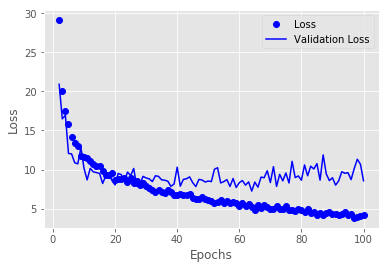

In [0]:
import matplotlib.pyplot as plt
epochs = range(1, len(h.history['mae']) + 1)
plt.style.use('ggplot')
plt.plot(epochs[1:], h.history['loss'][1:], 'bo', 
         label='Loss')
plt.plot(epochs[1:], h.history['val_loss'][1:], 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

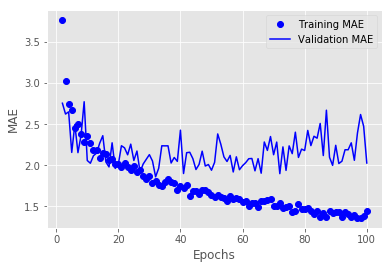

In [0]:
plt.clf()
mae_values = h.history['mae']
val_mae_values = h.history['val_mae']

plt.plot(epochs[1:], mae_values[1:], 'bo', 
         label='Training MAE')
plt.plot(epochs[1:], val_mae_values[1:], 'b',
         label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend();

In [0]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [0]:
test_mae_score

152.50223

***